In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

To make a presentation: jupyter nbconvert '.\SQL Part 1 Presentation.ipynb' --to slides --no-prompt --post serve 

# SQL Part 1

# Why Are We Learning This? 

Let's orient ourselves a little bit (*e.g. where does what we are learning now fit into our goals of become a bad-ass Data Analyst?*)

<img src="https://media.giphy.com/media/l4hLHAzilbp8rakLK/giphy.gif" width="500" height="500" />

So far in this course you have learned:
* How to code - this is the foundation for everything. You can't really work with computers unless you can speak their language
* What data is - underlying principles of what a data analyst works with
* Exploratory Data Analysis (EDA) - not all data is the same, this is how to understand more about the data you are working with
* Data Cleaning - How to make sure that the data that you are working with is the best it can be
* Data Manipulation - How to get that data into the form and structure that you need for your analysis
* Data Visualization - Communicating to yourself and to peers or stakeholders about insight that come from the data

NOW we are kind of going to go backwards a little bit. How do you get the data that you need in the first place? What if there is too much data to load into a local environment? 

# Agenda for Tonight

1. Data formats
2. Databases 
3. SQL and it's basic syntax 
4. Practice makes better

# Data Formats 

There are two main types of data formats: **Structured** and **Unstructured**

It's important to learn the difference, because the way that the data is structured will determine how it is stored and how you can interact with it

# Data Format Comparison

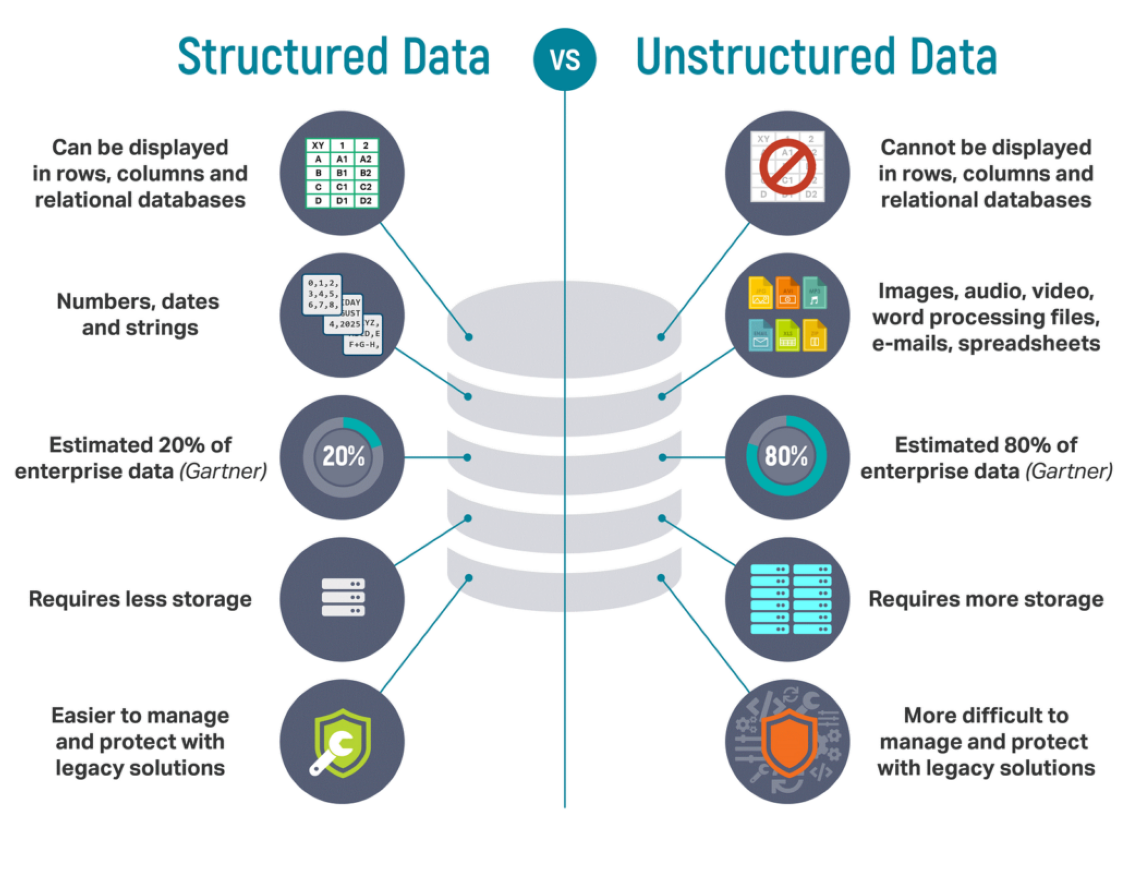

In [8]:
fig = plt.figure(figsize=(20,20))
plt.axis('off')
plt.imshow(mpimg.imread('./Structured vs Unstructured Data.png'))
plt.show()

*Image from http://www.enlightenment.ind.in/2019/05/13/data-science/*

Even though unstructured data isn't in a super easy-to-use format, it is probably the most common data structure and it is still FULL of insights if we know how to get them (often requires AI/ML). So companies store this type of data in things like data lakes, data warehouses, and NoSQL databases

# Relational Databases

**Relational Database**: a database that contains a series of tables that relate to each other and can be connected to show relationship (hense the 'relational'). 

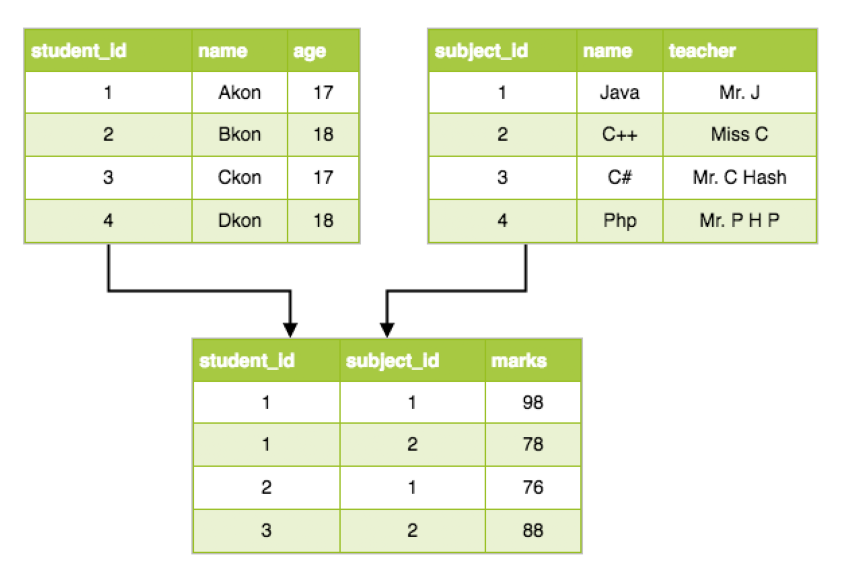

In [9]:
fig = plt.figure(figsize=(15,15))
plt.axis('off')
plt.imshow(mpimg.imread('./Relational Database Example.png'))
plt.show()

*Image from https://theintactone.com/2019/03/26/dbms-u1-topic-6-relational-data-model-semantic-data-model/)

# The Anatomy of a Database Table

**Record** : A row of data

**Field** : A column of data. Also called an Attribute

**Value** : the intersection of a row and a column. A 'piece/unit' of data.

**Primary Key** : The attribute (column) where the value for every record (row) is unique. The column that is the primary key must have NO duplicate values by definition. If you know the primary key, you know what record is being referenced. A table can only have one primary key (but it may not have any...). 

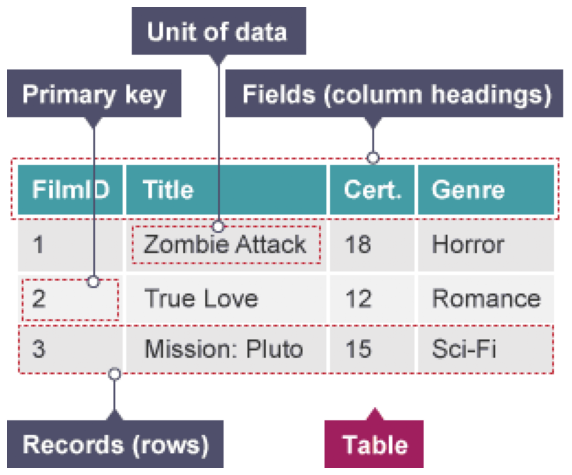

In [10]:
fig = plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(mpimg.imread('./Anatomy of a Table.png'))
plt.show()

*Image from https://www.bbc.co.uk/bitesize/guides/zfd2fg8/revision/5*

**Foreign Key** : a field within one table that is the primary key for a different table. These are what create relationships and are used to connect tables. A table can have multiple foreign keys (we'll talk about these more later when we discuss joining tables together).

**Composite Key** : a primary key that is a combination of multiple attributes (columns). The combination of the columns must be unique within the table. More common in NoSQL databases 

# What is SQL? 

There is SOOOO much data out there. A company can store data about basically everything that you do. But if you are analyzing only one part, you probably don't want to have to deal with all of the other data. How do you only get the data that you want? 

Just like programming languages are how we talk to computers, SQL is a language that allows us to talk to databases and tell them exactly what data we want. 

Can be used to create a database, create a table, insert and update data in the table, or retrieve data from a database. As a data analyst you'll likely primarily be retrieving data

**SQL** : Structured Query Language

**Query** : a request for data from a database

There are several slightly different variations of SQL (called dialects) and different platforms (called Database Management Systems or DBMSs) where you can write your queries including MySQL, Microsoft SQL Server, BigQuery, etc. We are specifically learning T-SQL (Transact-SQL) which is a dialect of SQL used in the Microsoft SQL Server DBMS

Kind of like cave-man speak

# The Structure (Syntax) of a SQL Query

In [10]:
"""
SELECT 
       TOP #
       [column_name_1], 
       [column_name_2] AS [new_column_name],
       FUNCTION([column_name_3]) AS [created_column_name],
FROM [table_name]
WHERE [conditions]
ORDER BY [column_name] ASC | DESC
GROUP BY [column_name]
"""

'\nSELECT \n       TOP #\n       [column_name_1], \n       [column_name_2] AS [new_column_name],\n       FUNCTION([column_name_3]) AS [created_column_name],\nFROM [table_name]\nWHERE [conditions]\nORDER BY [column_name] ASC | DESC\nGROUP BY [column_name]\n'

Why the capitilization? It makes queries easier to read (not required); a generally accepted best practice

# The Bare Minimum: SELECT and FROM

What do you want, and where is it!

**FROM** -- the table where the columns you want are located

TIP: If you fill this in first, a lot of SQL editors with help you fill in values in the rest of it

**SELECT** -- the columns you want

# Variations of SELECT : *

'**\***' -- means get EVERYTHING (all of the columns). This should be generally be avoided unless used with a function or if you know generally how much data you are asking for because it can often lead to long wait times and high resource consumption. You could be asking for a LOT of data!

# Variations of SELECT : TOP

**TOP** -- used to specify the max number of records we want returned. If a database is huge, we may just want to explore a chunk of it so our queries run faster. (in other flavors of SQL this may be 'LIMIT' and would come after the column names)

# Variations of SELECT : AS

**AS** -- let's you name a new column that you are creating, or change the name of a column you are having returned to you (in the output of the query, not in the source table itself)

# Variations of SELECT : DISTINCT

**DISTINCT** -- will only give you the unique values (no duplicates)

# Variations of SELECT : Functions

Functions are operations that you can apply to individual columns to get more useful information for questions you may have.

The most common functions:
* COUNT
* MIN
* MAX
* SUM
* AVG

When used on their own, functions will always give you back a single row because you are asking for a values that is applied to the whole table

# Making Functions More Useful : GROUP BY

**GROUP BY** -- puts records into groups based on a particular column so we can perform aggregate functions on each group. Usually used when there is a function in the SELECT statement, which is then applied to each group separately. Basically means it is going to pull all of the rows that have the same value in that column and create one row that represents that value for whatever function is being applied

When a GROUP BY is used with a function, the output will have as many rows are there are unique values for the attribute (column) that you are grouping by

# Organize the Output : ORDER BY

**ORDER BY** -- sort by one of the attributes in ascending (ASC) or descending (DESC) order (ascending by default)

# Filter for Only the Exact Data You Want : WHERE

**WHERE** -- a filter to only get the data that you are interested in. A condition the data must meet 

Possible operators:
* = : Equal to
* \> : Greater than
* \< : Less than
* \>= : Greater than or equal to
* \<= : Less than or equal to
* <> : Not equal
* BETWEEN #1 and #2 
* IN : is present in a given list of values
* LIKE : matches this pattern

# More About 'LIKE'

LIKE operators:
* % : represents any number of characters
* _ : represents a single character

If you are using multiple operators, it is a good idea to separate them with parenthesis so as not to get confused

# Summary

In [11]:
"""
SELECT 
       TOP #
       [column_name_1], 
       [column_name_2] AS [new_column_name],
       FUNCTION([column_name_3]) AS [created_column_name],
FROM [table_name]
WHERE [conditions]
ORDER BY [column_name] ASC | DESC
GROUP BY [column_name]
"""

'\nSELECT \n       TOP #\n       [column_name_1], \n       [column_name_2] AS [new_column_name],\n       FUNCTION([column_name_3]) AS [created_column_name],\nFROM [table_name]\nWHERE [conditions]\nORDER BY [column_name] ASC | DESC\nGROUP BY [column_name]\n'

# Order of Execution

1. FROM - you have to know where it is coming from before you get it!
2. WHERE - filter early so that later functions are applied to as few records as possible
3. GROUP BY - need to know what the groups are before you apply any functions to it
4. SELECT - what specifically you want
5. DISTINCT - pick out only the unique values for a certain column
6. ORDER BY - organize the data
7. TOP - grab the first couple

NOTE: may vary with optimizations used by the database's query processor and the database management system used

# SQL Best Practices

* Capitalization doesn't matter unless used inside quotes (you could use SeLeCt for all SQL cares!), but be consistent. Best to get into the habit of using all caps for clause starters (e.g. SELECT, FROM) because it is the most readable and is considered the most 'professional' by professionals

* Column names should be all lowercase and use snake_case (spaces will mess it up!)

* Table names should be in CamelCase

* Use comments to remind yourself what you are doing in complex queries

* When using functions, give your columsn useful names

* Use indentation (makes it easier to read, troubleshoot, and edit)